_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 50,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False,
            'float_format': lambda x: '%.3f' % x
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df = income.merge(lifespan)

In [0]:
df_v2 = income.merge(lifespan).merge(population)

In [0]:
df.sample(10)

In [0]:
columns = ['country','name','world_6region']
entities[columns]

In [0]:
df_v2 = df_v2.merge(entities[['country', 'name', 'world_6region']],left_on='geo', right_on='country')

In [38]:
df_v2 = df_v2.drop(columns=['geo', 'country'])
df_v2.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [40]:
col_name_map = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}

df_v2 = df_v2.rename(columns = col_name_map)
df_v2.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


## Explore data

## Plot visualization

In [41]:
now = df_v2[df_v2['year']==2018]
now.shape

(184, 6)

In [42]:
now.sample(10)

,year,income,lifespan,population,country,region
31457,2018,4441,68.77,41511526,Sudan,sub_saharan_africa
40217,2018,3865,59.45,17609178,Zambia,sub_saharan_africa
29486,2018,1387,71.13,25610672,North Korea,east_asia_pacific
26858,2018,5470,78.72,6284757,Nicaragua,america
6178,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
22431,2018,25524,75.13,1929938,Latvia,europe_central_asia
13890,2018,1282,61.90,13052608,Guinea,sub_saharan_africa
29267,2018,27668,78.19,38104832,Poland,europe_central_asia
5302,2018,16037,76.84,286388,Barbados,america
21336,2018,10887,76.57,179667,St. Lucia,america


In [0]:
sns.distplot(np.log10(now['population']))

In [0]:
sns.relplot(x='income',y='lifespan', hue='region', size='population',data=now)

## Analyze outliers

In [0]:
now[now['income']>80000].sort_values('income')

In [0]:
now[now['income']<1000].sort_values('income')

In [0]:
now[now['lifespan']<60].sort_values('lifespan')

In [0]:
def plot_annot_country(country_income,text_annot):
  country = now[now['country']==country_name]
  country_income = country['income'].values[0]
  country_lifespan = country['lifespan'].values[0]
  sns.relplot(x='income',y='lifespan',hue='region',size='population',data=now)
  plt.text(x=country_income-10,y=country_lifespan+1, s=country_name)

In [0]:
country_name='Somalia'
text_annot = "Is one of the poorest countries"
plot_annot_country(country_name,text_annot)

## Plot multiple years

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [12]:
#Creating initial subset of data, our primary targets for story telling
df = income.merge(lifespan).merge(population)
df.sample(10)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
34233,swe,1947,10790,69.360,6763099
3324,bgd,2011,2571,70.980,153911916
13673,gin,1801,450,29.510,983959
17254,irq,1878,1269,31.300,1734620
36710,tto,2015,31283,73.070,1360092
5581,btn,1859,682,28.800,109219
30961,rwa,1960,635,44.160,2933428
19928,kor,1924,806,30.570,12786653
39420,wsm,1878,1710,25.780,38605
19185,kgz,1838,597,23.940,626133


In [14]:
#Grabbing name and world region from the entities dataset, country is only included for merging purposes
df = df.merge(entities[['country','name','world_6region']], left_on = 'geo',right_on = 'country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.210,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.200,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.190,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.180,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.170,3280000,afg,Afghanistan,south_asia


In [15]:
#Dropping geo and country because they're redundant, and not really useful data
df = df.drop(columns=['geo','country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.210,3280000,Afghanistan,south_asia
1,1801,603,28.200,3280000,Afghanistan,south_asia
2,1802,603,28.190,3280000,Afghanistan,south_asia
3,1803,603,28.180,3280000,Afghanistan,south_asia
4,1804,603,28.170,3280000,Afghanistan,south_asia


In [16]:
#Renaming the columns to make them easier to read
col_name_map = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}

df = df.rename(columns = col_name_map)
df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.210,3280000,Afghanistan,south_asia
1,1801,603,28.200,3280000,Afghanistan,south_asia
2,1802,603,28.190,3280000,Afghanistan,south_asia
3,1803,603,28.180,3280000,Afghanistan,south_asia
4,1804,603,28.170,3280000,Afghanistan,south_asia


In [17]:
#From here on we're just looking at info about the dataset, seeing if there's any type we may want to change, etc
df.describe()

,year,income,lifespan,population
count,40437.000,40437.000,40437.000,40437.000
mean,1909.293,4619.493,43.132,13712042.573
std,63.309,10209.571,16.313,66063348.915
min,1800.000,247.000,1.000,2128.000
25%,1854.000,876.000,31.160,411331.000
50%,1909.000,1442.000,35.500,1985952.000
75%,1964.000,3488.000,55.970,6499707.000
max,2018.000,177522.000,84.170,1415045928.000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region        40437 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [20]:
df.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [26]:
#Now we're just going to do some exploring and try and find some interesting things
df[df['income'] <= 300]

,year,income,lifespan,population,country,region
20874,1994,266,48.950,2012885,Liberia,sub_saharan_africa
20875,1995,247,50.320,2073482,Liberia,sub_saharan_africa
20876,1996,263,49.260,2191179,Liberia,sub_saharan_africa


In [28]:
df['region'].unique()

array(['south_asia', 'sub_saharan_africa', 'europe_central_asia',
       'middle_east_north_africa', 'america', 'east_asia_pacific'],
      dtype=object)

In [29]:
df[df['income']>2000].describe()

,year,income,lifespan,population
count,15578.000,15578.000,15578.000,15578.000
mean,1955.490,10337.772,57.530,18888656.286
std,46.709,14735.125,15.492,76524320.136
min,1800.000,2001.000,1.090,15800.000
25%,1927.000,2905.000,43.600,1040111.500
50%,1965.000,4996.500,61.040,4174243.000
75%,1993.000,10971.000,70.778,12640935.750
max,2018.000,177522.000,84.170,1415045928.000


In [31]:
singapore = df[df['country']=='Singapore']
singapore[singapore['year'].isin([1818,1918,2018])]

,year,income,lifespan,population,country,region
31695,1818,1024,29.100,31136,Singapore,east_asia_pacific
31795,1918,2423,21.880,369665,Singapore,east_asia_pacific
31895,2018,83888,84.030,5791901,Singapore,east_asia_pacific


In [34]:
#Now we're going to visualize our data, and try and tell a story with it
today = df[df['year']==2018]
today.shape

(184, 6)

In [35]:
today.sample(10)

,year,income,lifespan,population,country,region
25763,2018,1134,61.030,19164728,Malawi,sub_saharan_africa
30581,2018,23399,75.530,19580634,Romania,europe_central_asia
28391,2018,23374,79.400,4162618,Panama,america
13890,2018,1282,61.900,13052608,Guinea,sub_saharan_africa
32552,2018,8293,75.750,6411558,El Salvador,america
38903,2018,14211,75.910,32381221,Venezuela,america
3112,2018,1710,61.600,19751651,Burkina Faso,sub_saharan_africa
9463,2018,32302,79.370,10625250,Czech Republic,europe_central_asia
10386,2018,15227,76.110,10882996,Dominican Republic,america
15423,2018,7739,68.150,782225,Guyana,america


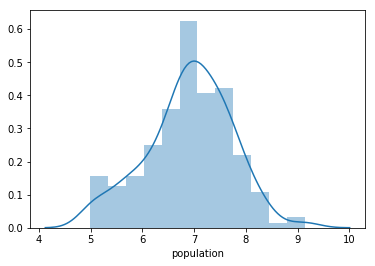

In [36]:
#This plot is a great way to look at large data in a bit of a normalized scale
#It basically turns large numbers into factors, and allows the plot to be much more human readable
sns.distplot(np.log10(today['population']))

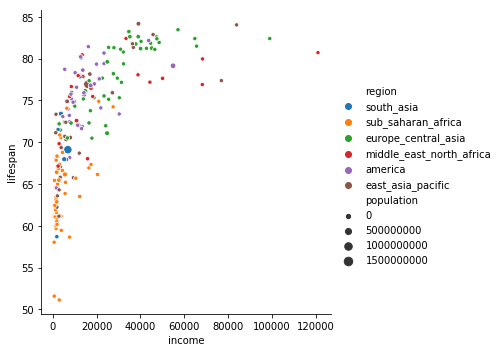

In [37]:
#This is a great plot in my opinion, I love the way color and size were used to help show the relationships between four different data types
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=today)

In [38]:
#Now, we're going to have a look at our outliers, just to see which areas in the data may have large skews
#We can see from this line of code, that only 3 countries actually have higher than an 80k income, we may have some skew there
today[today['income']>80000]

,year,income,lifespan,population,country,region
22212,2018,99034,82.390,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.710,2694849,Qatar,middle_east_north_africa
31895,2018,83888,84.030,5791901,Singapore,east_asia_pacific


In [39]:
#And here, we can see a possible bit of skew from the low end as well, having only 6 countries in our lowest end
today[today['income']<1000]

,year,income,lifespan,population,country,region
2455,2018,691,61.140,11216450,Burundi,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
7711,2018,751,62.420,84004989,"Congo, Dem. Rep.",sub_saharan_africa
20898,2018,801,65.430,4853516,Liberia,sub_saharan_africa
26420,2018,949,62.450,22311375,Niger,sub_saharan_africa
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa


In [0]:
#Now I'm going to make a function to make some annotations on the plot we made earlier, so we can show some of these more easily
def plot_annotate(country_name,text_anno):
  country = today[today['country']==country_name]
  country_income = country['income'].values[0]
  country_lifespan = country['lifespan'].values[0]
  sns.relplot(x='income', y='lifespan', hue='region', size='population', data=today)
  plt.text(x=country_income-5000,y=country_lifespan+1,s=country_name)
  plt.title(f'{country_name} {text_anno}')
  

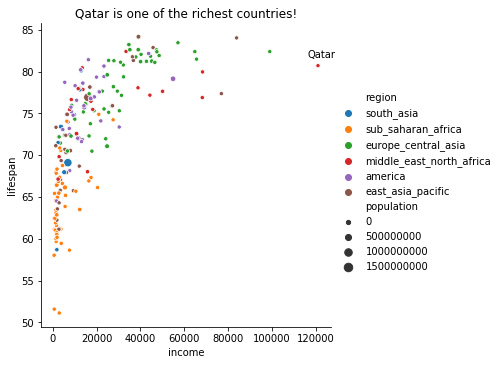

In [42]:
cn = 'Qatar'
ta = 'is one of the richest countries!'
plot_annotate(cn,ta)